## Ethereum Stock Prices

* Import data
    * Show prices, market capital and volume
    * Analysis
* Preprocessing data
    * Complete the Index
    * Find NaN and Fix it
    * Normalizing
* Split training and test datasets
* Build the model
* Test the model
* Conclusions

### Import Libraries

In [32]:
import random
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

### Import Data and Analysis

In [33]:
data = pd.read_csv('eth-eur.csv')
data.iloc[random.randint(0, data.shape[0])]

snapped_at      2015-08-13 00:00:00 UTC
price                           1.63667
market_cap                  9.90478e+07
total_volume                3.92729e+06
Name: 5, dtype: object

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
snapped_at      896 non-null object
price           896 non-null float64
market_cap      895 non-null float64
total_volume    896 non-null float64
dtypes: float64(3), object(1)
memory usage: 28.1+ KB


In [35]:
#customize index
data.snapped_at[0].split()[0]
data.snapped_at = data.snapped_at.apply(lambda x: x.split()[0])

In [36]:
data.set_index('snapped_at', inplace=True)
data.index = pd.to_datetime(data.index)

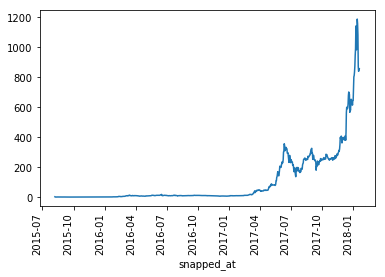

In [37]:
data.price.plot(rot=90)

In [38]:
data.head(24)

,price,market_cap,total_volume
snapped_at,,,
2015-08-07,2.580213,0.000000e+00,8.257608e+04
2015-08-08,1.175306,7.095505e+07,3.250759e+05
2015-08-10,0.624116,3.772033e+07,3.634980e+05
2015-08-11,0.966607,5.844581e+07,1.375588e+06
2015-08-12,1.126292,6.813006e+07,1.858814e+06
2015-08-13,1.636673,9.904778e+07,3.927292e+06
2015-08-14,1.643557,9.951063e+07,3.920484e+06
2015-08-15,1.505036,9.116528e+07,2.269451e+06
2015-08-16,1.329391,8.055977e+07,2.730304e+06


### Preprocessing Data

#### Complete the Index

The list is not complete _(2015-08-09 is missing)_ so we have to fill the blanks.

In [39]:
#check
'2015-08-09 00:00:00' in data.index

False

In [40]:
#Generate all the possible days and use them to reindex
start = data.index[data.index.argmin()]
end = data.index[data.index.argmax()]

index_complete = pd.date_range(start, end)
data = data.reindex(index_complete)

#### Find NaN and Fix it

In [41]:
#Fill the blanks with the mean between the previous and the day after

for idx in data.index:
    dayloc = data.index.get_loc(idx)
    day = data.loc[idx]
    if day.hasnans:
        #updating
        rg = slice(dayloc-1, dayloc+2)
        data.loc[idx] = data.iloc[rg].mean()
        
        print("Day <{}> updated".format(idx))

Day <2015-08-09 00:00:00> updated
Day <2017-04-02 00:00:00> updated


In [42]:
#check
data.loc['2015-08-09 00:00:00']

price           8.997108e-01
market_cap      5.433769e+07
total_volume    3.442869e+05
Name: 2015-08-09 00:00:00, dtype: float64

In [43]:
#Checking if we have NaN in another place
data[data.isnull().any(axis=1)].count()

price           0
market_cap      0
total_volume    0
dtype: int64

#### Normalizing

In [44]:
#Scale the data
scaler = StandardScaler()

data[data.columns] = scaler.fit_transform(data)
data.describe()

,price,market_cap,total_volume
count,8.970000e+02,8.970000e+02,8.970000e+02
mean,-3.168529e-17,6.337059e-17,-6.337059e-17
std,1.000558e+00,1.000558e+00,1.000558e+00
min,-5.501562e-01,-5.415878e-01,-4.110179e-01
25%,-5.135045e-01,-5.077948e-01,-4.031238e-01
50%,-4.943143e-01,-4.909240e-01,-3.822954e-01
75%,3.991864e-01,3.770718e-01,-1.335186e-02
max,5.904563e+00,5.955011e+00,9.357096e+00
